In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)

In [87]:

from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split
digits=load_digits()
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=1,stratify=digits.target)
classifier = LinearSVC(random_state=1).fit(x_train, y_train)
pred_y=classifier.predict(x_test)
print(classifier.score(x_test,y_test))

0.9511111111111111


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_y)

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  1],
       [ 0,  2,  0,  0, 41,  0,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  0, 42,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 42,  1,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 45]])

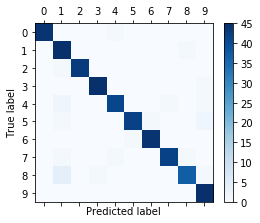

In [89]:
plt.matshow(confusion_matrix(y_test,pred_y),cmap='Blues')

plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        45
          1       0.83      0.98      0.90        46
          2       1.00      0.98      0.99        44
          3       0.98      0.98      0.98        46
          4       0.95      0.91      0.93        45
          5       0.98      0.91      0.94        46
          6       0.98      0.98      0.98        45
          7       0.98      0.93      0.95        45
          8       0.95      0.86      0.90        43
          9       0.90      1.00      0.95        45

avg / total       0.95      0.95      0.95       450



In [91]:
np.bincount(digits.target)/digits.target.shape[0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [92]:
from sklearn.metrics import roc_auc_score,roc_curve
#X_train,X_test,y_train,y_test=train_test_split(random_state=42)
X,y=digits.data,digits.target

ValueError: multiclass format is not supported

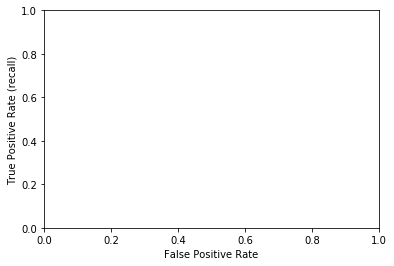

In [93]:
#roc failing
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for gamma in [.01, .05, 1]:
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    svm = SVC(gamma=gamma).fit(X_train, y_train)
    decision_function = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, decision_function)
    acc = svm.score(X_test, y_test)
    auc = roc_auc_score(y_test, svm.decision_function(X_test))
    plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc), linewidth=3)
plt.legend(loc="best");

In [96]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(), X, y, scoring="roc_auc")

ValueError: multiclass format is not supported